# Visualizing COVID-19 cases in Korea
## Objective:
- Looking at trend of COVID-19 cases in Korea from different aspects
- Visualize COVID-19 record

In [92]:
import urllib.request #Open and read URLs
import pandas as pd
from datetime import datetime, timedelta
import requests
import xmltodict

In [93]:
# Bringing XML data
url_base ='http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson?serviceKey='
url_servicekey ='qu0tj3RMV5miM%2Bwxf%2BSFK%2BrsI%2BZJl%2FvR7bxOpP1ufhLJ%2FeEZFP%2FyrfZE3VeeRuRai4nKXPFB1rdyaSx0gCmubQ%3D%3D'
url_pages = '1000'
url_start_date ='20200101'
url_end_date =datetime.today().strftime('%Y%m%d') # Current date

In [94]:
url = url_base + url_servicekey + '&pageNo=1&num0fRows=' + url_pages + '&startCreateDt=' + url_start_date + '&endCreateDt=' + url_end_date
print(url)

http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson?serviceKey=qu0tj3RMV5miM%2Bwxf%2BSFK%2BrsI%2BZJl%2FvR7bxOpP1ufhLJ%2FeEZFP%2FyrfZE3VeeRuRai4nKXPFB1rdyaSx0gCmubQ%3D%3D&pageNo=1&num0fRows=1000&startCreateDt=20200101&endCreateDt=20220909


- Within the XML, our data is in (response)(body)(items)(item)
- Save in a dictionary and convert it to dataframe

In [95]:
response =requests.get(url).content

xmlobject =xmltodict.parse(response)
dict_data =xmlobject['response']['body']['items']['item']

getCovidInfo =pd.DataFrame(dict_data)

In [96]:
getCovidInfo.head()

,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,2022-09-09 09:15:06.091,27381,23933949,1000,20220909,00:00,null,NaN,NaN
1,2022-09-08 09:09:48.653,27313,23864539,999,20220908,00:00,2022-09-09 09:15:24.068,NaN,NaN
2,2022-09-07 09:12:02.364,27249,23791893,998,20220907,00:00,2022-09-09 09:15:40.978,NaN,NaN
3,2022-09-06 08:57:40.354,27193,23706364,997,20220906,00:00,2022-09-09 09:16:09.086,NaN,NaN
4,2022-09-05 09:15:52.775,27149,23606542,996,20220905,00:00,2022-09-09 09:16:20.843,NaN,NaN


- createDt = created Date
- deathCnt = Total Number of death
- decideCnt = Total Number of cases
- seq = sequence
- stateDt = Date
- stateTime = Time
- updatedDt = Edited Time
- accExamCnt = Total Number of people got tested
- accDefRate = % of getting positive in test

In [97]:
# Find duplicate.
print(getCovidInfo.duplicated(subset=['stateDt']).sum())

0


In [98]:
# Order the data by stateDt asscending order
getCovidInfo2 =getCovidInfo.sort_values(by='stateDt')
getCovidInfo2.head()

,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
961,2020-01-20 17:00:00.000,0,1,1,20200120,17:00,2021-10-07 10:30:51.51,4,25
960,2020-01-21 09:00:00.000,0,1,2,20200121,09:00,2021-10-07 10:30:51.51,15,6.666666667
959,2020-01-22 12:00:00.000,0,1,3,20200122,12:00,2021-10-07 10:30:51.51,21,4.761904762
958,2020-01-23 09:00:00.000,0,1,4,20200123,09:00,2021-10-07 10:30:51.51,25,4
957,2020-01-24 00:00:00.000,0,2,5,20200124,00:00,2021-10-07 10:30:51.51,29,6.896551724


- In the getCovidInfo2 table, accExamCnt and accDefRate are specified when getCovidInfo table are not. This is because from Dec 2021, Ministry of Health did not record those two columns

In [99]:
# Convert number of cases and death as numeric / stateDt as datetime
getCovidInfo2['deathCnt'] =pd.to_numeric(getCovidInfo2['deathCnt'])
getCovidInfo2['decideCnt'] =pd.to_numeric(getCovidInfo2['decideCnt'])
getCovidInfo2['stateDt'] =getCovidInfo2['stateDt'].astype('datetime64')

In [100]:
# Data types changed
getCovidInfo2.dtypes

createDt              object
deathCnt               int64
decideCnt              int64
seq                   object
stateDt       datetime64[ns]
stateTime             object
updateDt              object
accExamCnt            object
accDefRate            object
dtype: object

In [101]:
# Calculate daily cases and death
getCovidInfo2['daily_deathCnt'] =getCovidInfo2['deathCnt'].diff()
getCovidInfo2['daily_decideCnt'] =getCovidInfo2['decideCnt'].diff()

In [102]:
# Only choose the dataset that I want to use
getCovidInfo3 =getCovidInfo2[['stateDt', 'daily_decideCnt', 'decideCnt', 'daily_deathCnt', 'deathCnt']]
getCovidInfo3.columns =['date', 'daily_confirmed_cases', 'total_confirmed_cases', 'daily_number_death', 'total_number_death']

In [103]:
# Any NaN values in the table, fill with 0
getCovidInfo3 =getCovidInfo3.fillna(0)
getCovidInfo3

,date,daily_confirmed_cases,total_confirmed_cases,daily_number_death,total_number_death
961,2020-01-20,0.0,1,0.0,0
960,2020-01-21,0.0,1,0.0,0
959,2020-01-22,0.0,1,0.0,0
958,2020-01-23,0.0,1,0.0,0
957,2020-01-24,1.0,2,0.0,0
...,...,...,...,...,...
4,2022-09-05,37530.0,23606542,56.0,27149
3,2022-09-06,99822.0,23706364,44.0,27193
2,2022-09-07,85529.0,23791893,56.0,27249
1,2022-09-08,72646.0,23864539,64.0,27313


In [104]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 7) # This is to use change default size of the figure

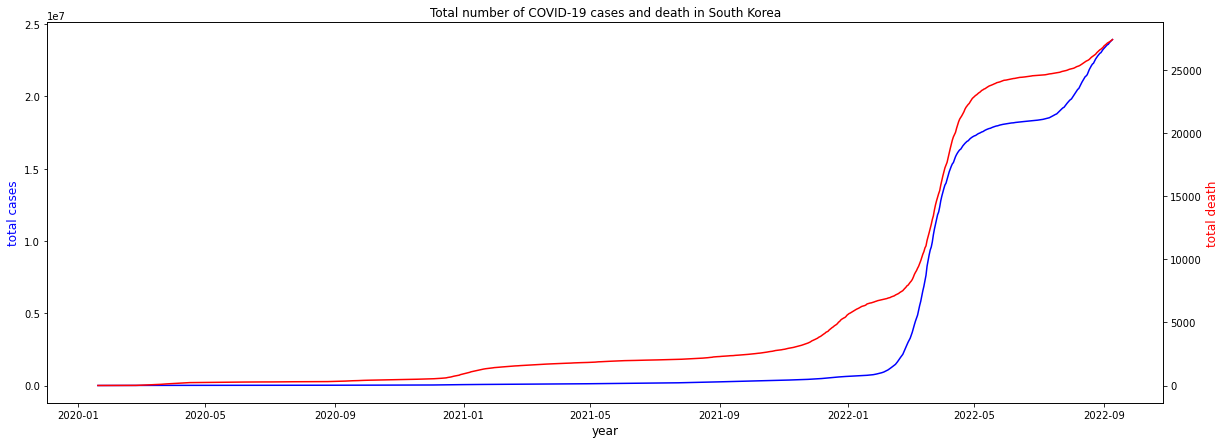

In [105]:
# Total number of deaths and cases as graph
fig,ax =plt.subplots()

ax.plot(getCovidInfo3['date'], getCovidInfo3['total_confirmed_cases'], color='blue')
ax.set_xlabel('year', fontsize =12)
ax.set_ylabel('total cases', color ='blue', fontsize =12)

ax2=ax.twinx()

ax2.plot(getCovidInfo3['date'], getCovidInfo3['total_number_death'], color='red')
ax2.set_ylabel('total death', color='red', fontsize =12)
plt.title('Total number of COVID-19 cases and death in South Korea')
plt.show()

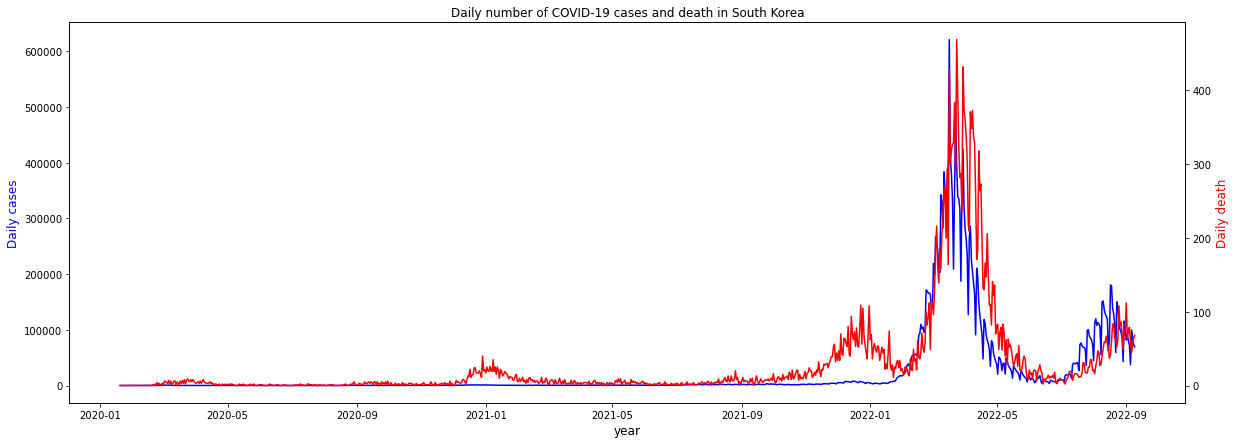

In [106]:
# Daily number of deaths and cases as graph
fig,ax =plt.subplots()

ax.plot(getCovidInfo3['date'], getCovidInfo3['daily_confirmed_cases'], color='blue')
ax.set_xlabel('year', fontsize =12)
ax.set_ylabel('Daily cases', color ='blue', fontsize =12)

ax2=ax.twinx()

ax2.plot(getCovidInfo3['date'], getCovidInfo3['daily_number_death'], color='red')
ax2.set_ylabel('Daily death', color='red', fontsize =12)
plt.title('Daily number of COVID-19 cases and death in South Korea')
plt.show()

- Looking at total & daily number of cases and death, the big trend of number of cases and number of death are similar. Higher the number of cases, higher the number of death.
- There was big spike on number of death in-between December 2021 and January 2022, this is due to massive increase of serious cases of elder people
- Massive increase of cases & death from mid-February 2022

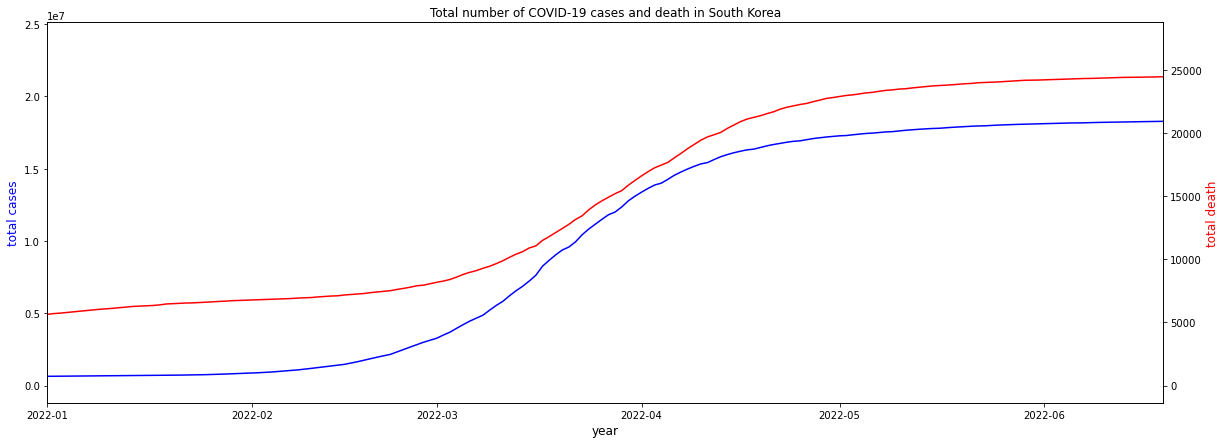

In [107]:
# Explore the massive increase in 2022
fig,ax =plt.subplots()

left = datetime(2022, 1, 1)
right = datetime(2022, 6, 19)

ax.plot(getCovidInfo3['date'], getCovidInfo3['total_confirmed_cases'], color='blue')
ax.set_xlabel('year', fontsize =12)
ax.set_ylabel('total cases', color ='blue', fontsize =12)

ax2=ax.twinx()

ax2.plot(getCovidInfo3['date'], getCovidInfo3['total_number_death'], color='red')
ax2.set_ylabel('total death', color='red', fontsize =12)
plt.title('Total number of COVID-19 cases and death in South Korea')
plt.gca().set_xbound(left, right)

plt.show()

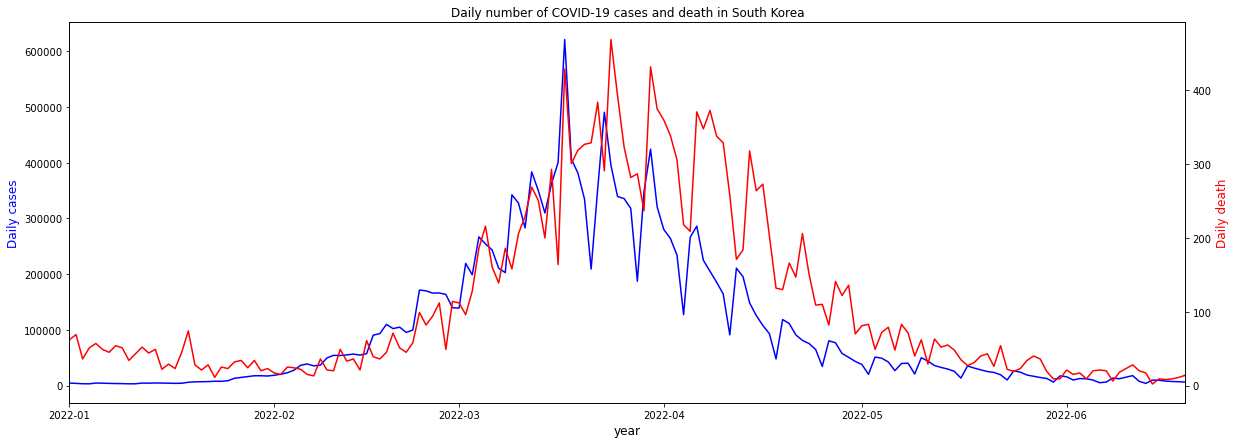

In [108]:
fig,ax =plt.subplots()

left = datetime(2022, 1, 1)
right = datetime(2022, 6, 19)

ax.plot(getCovidInfo3['date'], getCovidInfo3['daily_confirmed_cases'], color='blue')
ax.set_xlabel('year', fontsize =12)
ax.set_ylabel('Daily cases', color ='blue', fontsize =12)

ax2=ax.twinx()

ax2.plot(getCovidInfo3['date'], getCovidInfo3['daily_number_death'], color='red')
ax2.set_ylabel('Daily death', color='red', fontsize =12)
plt.title('Daily number of COVID-19 cases and death in South Korea')
plt.gca().set_xbound(left, right)

plt.show()

Various Reasons of why number of cases and death were spiked starting from mid-Feb
- First Omicron case was found from December 2021. As it was spreading faster than Delta or other previous variant, cases increase lot from February
- Easing the regulation and social distancing of COVID-19
- Including number of people who got positive result in RAT test into total number of cases

As the number of cases and death are reducing after spike on mid-March, goverment decides to ease all the regulation except "Must wear Mask" from mid-April

In [109]:
# COVID-19 Cases by Region

In [110]:
import json
# Plotly - interactive open-source plotting library
# For visualization
import plotly.graph_objects as go
import plotly.express as px

In [111]:
# Bringing XML data
url2_base ='http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson?serviceKey='
url2_servicekey ='qu0tj3RMV5miM%2Bwxf%2BSFK%2BrsI%2BZJl%2FvR7bxOpP1ufhLJ%2FeEZFP%2FyrfZE3VeeRuRai4nKXPFB1rdyaSx0gCmubQ%3D%3D'
url2_pages = '1000'
url2_start_date ='20200101'
url2_end_date =datetime.today().strftime('%Y%m%d') # Current date

In [112]:
url2 = url2_base + url2_servicekey + '&pageNo=1&num0fRows=' + url2_pages + '&startCreateDt=' + url2_start_date + '&endCreateDt=' + url2_end_date
print(url)

http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson?serviceKey=qu0tj3RMV5miM%2Bwxf%2BSFK%2BrsI%2BZJl%2FvR7bxOpP1ufhLJ%2FeEZFP%2FyrfZE3VeeRuRai4nKXPFB1rdyaSx0gCmubQ%3D%3D&pageNo=1&num0fRows=1000&startCreateDt=20200101&endCreateDt=20220909


In [113]:
# Don't run too often. Takes some time
response2 =requests.get(url2).content

xmlobject2 =xmltodict.parse(response2)
dict_data2 =xmlobject2['response']['body']['items']['item']

getCovidRegion =pd.DataFrame(dict_data2)

In [114]:
# Order the data by stateDt asscending order
getCovidRegion2 =getCovidRegion.sort_values(by='stdDay')
getCovidRegion2.head()

,createDt,deathCnt,defCnt,gubun,gubunCn,gubunEn,incDec,localOccCnt,overFlowCnt,qurRate,seq,stdDay,updateDt,isolClearCnt
18315,2020-01-20 09:00:00.000,0,0,검역,隔離區,Lazaretto,0,0,0,0.00,1,2020년 01월 20일 00시,2021-09-16 10:11:33.897,0
18297,2020-01-20 09:00:00.000,0,1,합계,合计,Total,0,0,1,0.00,19,2020년 01월 20일 00시,2021-09-16 10:11:33.897,0
18298,2020-01-20 09:00:00.000,0,0,서울,首尔,Seoul,0,0,0,0.00,18,2020년 01월 20일 00시,2021-09-16 10:11:33.897,0
18299,2020-01-20 09:00:00.000,0,0,부산,釜山,Busan,0,0,0,0.00,17,2020년 01월 20일 00시,2021-09-16 10:11:33.897,0
18300,2020-01-20 09:00:00.000,0,0,대구,大邱,Daegu,0,0,0,0.00,16,2020년 01월 20일 00시,2021-09-16 10:11:33.897,0


- createDt = created date
- deathCnt = Total death
- defCnt = Total cases
- gubunEn = Region Name (ENG)
- incDec = Change of number of cases vs previous day
- localOccCnt = case from domestic
- overFlowCnt = case from international

In [115]:
# Find duplicates
print(getCovidRegion2.duplicated(subset=['seq']).sum())

0


In [116]:
# Changing Object to relevant data types

chg_int =['deathCnt', 'defCnt', 'incDec', 'localOccCnt', 'overFlowCnt']
for obj in chg_int:
    getCovidRegion2[obj] =getCovidRegion2[obj].astype(int)

getCovidRegion2['createDt'] =getCovidRegion2['createDt'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))

In [117]:
getCovidRegion2.dtypes

createDt        datetime64[ns]
deathCnt                 int64
defCnt                   int64
gubun                   object
gubunCn                 object
gubunEn                 object
incDec                   int64
localOccCnt              int64
overFlowCnt              int64
qurRate                 object
seq                     object
stdDay                  object
updateDt                object
isolClearCnt            object
dtype: object

In [118]:
# Only choose the dataset that I want to use
getCovidRegion3 =getCovidRegion2[['createDt', 'deathCnt', 'defCnt', 'gubunEn', 'incDec', 'localOccCnt', 'overFlowCnt']]
getCovidRegion3.columns =['date', 'Total_number_death', 'total_confirmed_cases', 'Region', 'vs yesterday', 'Domestic_cases', 'International_cases']

In [119]:
# Any NaN values in the table, fill with 0
getCovidRegion3 =getCovidRegion3.fillna(0)
getCovidRegion3.head()

,date,Total_number_death,total_confirmed_cases,Region,vs yesterday,Domestic_cases,International_cases
18315,2020-01-20 09:00:00,0,0,Lazaretto,0,0,0
18297,2020-01-20 09:00:00,0,1,Total,0,0,1
18298,2020-01-20 09:00:00,0,0,Seoul,0,0,0
18299,2020-01-20 09:00:00,0,0,Busan,0,0,0
18300,2020-01-20 09:00:00,0,0,Daegu,0,0,0


In [120]:
getCovidRegion3.drop(getCovidRegion3[getCovidRegion3['Region'] == 'Total'].index, inplace =True)
getCovidRegion3.drop(getCovidRegion3[getCovidRegion3['Region'] == 'Lazaretto'].index, inplace =True)
getCovidRegion3.head()

,date,Total_number_death,total_confirmed_cases,Region,vs yesterday,Domestic_cases,International_cases
18298,2020-01-20 09:00:00,0,0,Seoul,0,0,0
18299,2020-01-20 09:00:00,0,0,Busan,0,0,0
18300,2020-01-20 09:00:00,0,0,Daegu,0,0,0
18301,2020-01-20 09:00:00,0,1,Incheon,0,0,1
18302,2020-01-20 09:00:00,0,0,Gwangju,0,0,0


In [121]:
import plotly.graph_objects as go
import plotly.express as px

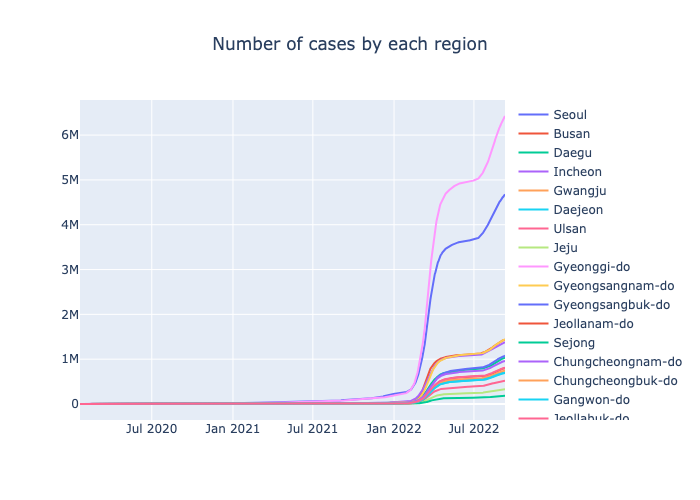

In [122]:
charts = []
for area in list(getCovidRegion3.Region.unique()):
    getCovidRegion4 = getCovidRegion3[getCovidRegion3.Region == area]
    charts.append(go.Scatter(x=getCovidRegion4.date, y=getCovidRegion4.total_confirmed_cases, name=getCovidRegion4.iloc[0].Region))

fig = go.Figure(charts)
fig.update_layout(
    title=dict(
        text='Number of cases by each region',
        x=0.5
    )
)
fig.show('png')

In [123]:
# Creating domestic cases by region of today
yesterday =pd.to_datetime("today") - pd.Timedelta(2, unit='D')

today_covid =getCovidRegion3[getCovidRegion3.date >= yesterday]
sorted_today_covid =today_covid.sort_values('Domestic_cases', ascending = False)
sorted_today_covid

,date,Total_number_death,total_confirmed_cases,Region,vs yesterday,Domestic_cases,International_cases
28,2022-09-08 09:07:30.370,6906,6407991,Gyeonggi-do,19292,19277,15
9,2022-09-09 09:18:04.735,6928,6425850,Gyeonggi-do,17872,17845,27
36,2022-09-08 09:07:30.368,5319,4667217,Seoul,13066,13057,9
17,2022-09-09 09:18:04.733,5332,4679529,Seoul,12315,12305,10
21,2022-09-08 09:07:30.372,1438,1439985,Gyeongsangnam-do,4751,4739,12
2,2022-09-09 09:18:04.738,1443,1444569,Gyeongsangnam-do,4584,4568,16
33,2022-09-08 09:07:30.369,1491,1373189,Incheon,4248,4188,60
14,2022-09-09 09:18:04.734,1493,1377294,Incheon,4105,4028,77
22,2022-09-08 09:07:30.372,1590,1071946,Gyeongsangbuk-do,3937,3925,12
34,2022-09-08 09:07:30.369,1559,1030602,Daegu,3931,3922,9


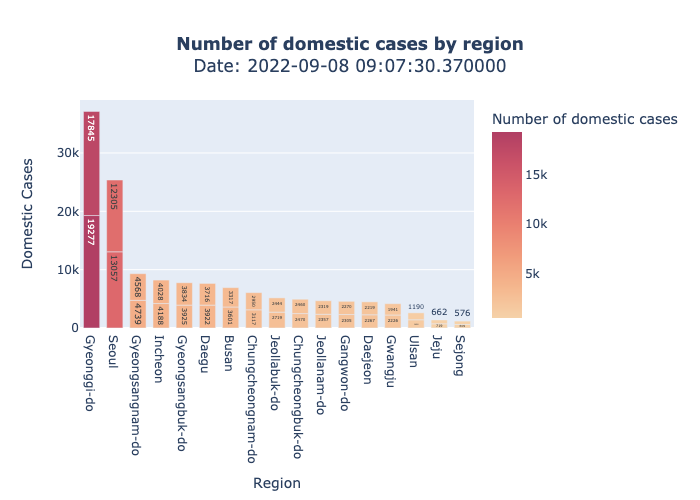

In [124]:
# Showing in bar chart
max_date = sorted_today_covid.date.iloc[0]
fig = px.bar(
    sorted_today_covid, 
    x=sorted_today_covid.Region, 
    y=sorted_today_covid.Domestic_cases, 
    title='Region',
    text='Domestic_cases',
    color='Domestic_cases', 
    color_continuous_scale=px.colors.sequential.Redor,
    labels={'Domestic_cases':'Number of domestic cases'}
)
fig.update_layout(
    title=dict(
        text=f"<b>Number of domestic cases by region</b><br>Date: {max_date}", 
        x=0.5,        
    ),
    xaxis_title='Region', 
    yaxis_title='Domestic Cases', 
    bargap=0.3,     
)
fig.show('png')

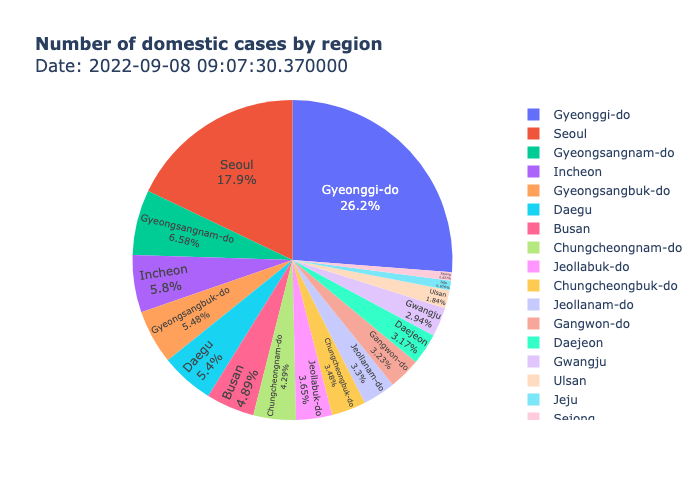

In [125]:
# Showing in pie chart
fig = px.pie(
    sorted_today_covid, 
    values='Domestic_cases', 
    names='Region', 
    title=f"<b>Number of domestic cases by region</b><br>Date: {max_date}",
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show('png')

In [126]:
# Covid-19 cases by age group and gender

In [127]:
# Bringing XML data
url3_base ='http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19GenAgeCaseInfJson?serviceKey='
url3_servicekey ='qu0tj3RMV5miM%2Bwxf%2BSFK%2BrsI%2BZJl%2FvR7bxOpP1ufhLJ%2FeEZFP%2FyrfZE3VeeRuRai4nKXPFB1rdyaSx0gCmubQ%3D%3D'
url3_pages = '1000'
url3_start_date ='20200101'
url3_end_date =datetime.today().strftime('%Y%m%d') # Current date

In [128]:
url3 = url3_base + url3_servicekey + '&pageNo=1&num0fRows=' + url3_pages + '&startCreateDt=' + url3_start_date + '&endCreateDt=' + url3_end_date
print(url3)

http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19GenAgeCaseInfJson?serviceKey=qu0tj3RMV5miM%2Bwxf%2BSFK%2BrsI%2BZJl%2FvR7bxOpP1ufhLJ%2FeEZFP%2FyrfZE3VeeRuRai4nKXPFB1rdyaSx0gCmubQ%3D%3D&pageNo=1&num0fRows=1000&startCreateDt=20200101&endCreateDt=20220909


In [129]:
response =requests.get(url3).content

xmlobject =xmltodict.parse(response)
dict_data =xmlobject['response']['body']['items']['item']

getCovidGenAge =pd.DataFrame(dict_data)

In [130]:
getCovidGenAge.head()

,confCase,confCaseRate,createDt,criticalRate,death,deathRate,gubun,seq,updateDt
0,2678848,11,2022-09-09 09:18:23.254,0,31,0,0-9,19648,null
1,3065517,13,2022-09-09 09:18:23.253,0,16,0,10-19,19647,null
2,3551214,15,2022-09-09 09:18:23.253,0,68,0,20-29,19646,null
3,3502843,15,2022-09-09 09:18:23.253,0,129,0,30-39,19645,null
4,3658375,15,2022-09-09 09:18:23.253,0,375,1,40-49,19644,null


- confCase = Total confirmed cases
- death = Total number of death
- createDt = Date
- gubun = age range / gender category

In [131]:
# Look at what kind of unique values are in 'gubun'
getCovidGenAge.gubun.unique()

array(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80 이상', '여성', '남성'], dtype=object)

In [132]:
# Find duplicates
print(getCovidGenAge.duplicated(subset=['seq']).sum())

0


In [133]:
# Change data types to relevant types
getCovidGenAge['confCase'] =pd.to_numeric(getCovidGenAge['confCase'])
getCovidGenAge['death'] =pd.to_numeric(getCovidGenAge['death'])
getCovidGenAge['createDt'] =getCovidGenAge['createDt'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))

In [134]:
getCovidGenAge.dtypes

confCase                 int64
confCaseRate            object
createDt        datetime64[ns]
criticalRate            object
death                    int64
deathRate               object
gubun                   object
seq                     object
updateDt                object
dtype: object

In [135]:
getCovidGenAge =getCovidGenAge[['createDt', 'confCase', 'death', 'gubun']]
getCovidGenAge.columns =['date', 'total_confirmed_cases', 'total_number_death', 'category']

In [136]:
getCovidGenAge

,date,total_confirmed_cases,total_number_death,category
0,2022-09-09 09:18:23.254,2678848,31,0-9
1,2022-09-09 09:18:23.253,3065517,16,10-19
2,2022-09-09 09:18:23.253,3551214,68,20-29
3,2022-09-09 09:18:23.253,3502843,129,30-39
4,2022-09-09 09:18:23.253,3658375,375,40-49
...,...,...,...,...
10599,2020-01-20 09:00:00.000,0,0,40-49
10600,2020-01-20 09:00:00.000,1,0,30-39
10601,2020-01-20 09:00:00.000,0,0,20-29
10602,2020-01-20 09:00:00.000,0,0,10-19


In [137]:
# Preapring dataset where category with only age range
getCovidGenAge_age = getCovidGenAge.copy()

In [138]:
# Drop gender from category
getCovidGenAge_age.drop(getCovidGenAge_age[getCovidGenAge_age['category'] == '남성'].index, inplace =True)
getCovidGenAge_age.drop(getCovidGenAge_age[getCovidGenAge_age['category'] == '여성'].index, inplace =True)
getCovidGenAge_age.head()

,date,total_confirmed_cases,total_number_death,category
0,2022-09-09 09:18:23.254,2678848,31,0-9
1,2022-09-09 09:18:23.253,3065517,16,10-19
2,2022-09-09 09:18:23.253,3551214,68,20-29
3,2022-09-09 09:18:23.253,3502843,129,30-39
4,2022-09-09 09:18:23.253,3658375,375,40-49


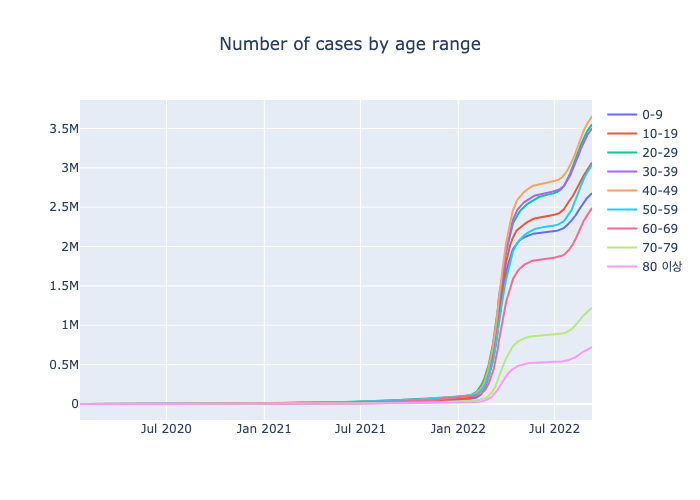

In [139]:
charts = []
for age in list(getCovidGenAge_age.category.unique()):
    getCovidGenAge_age2 = getCovidGenAge_age[getCovidGenAge_age.category == age]
    charts.append(go.Scatter(x=getCovidGenAge_age2.date, y=getCovidGenAge_age2.total_confirmed_cases, name=getCovidGenAge_age2.iloc[1].category))

fig = go.Figure(charts)
fig.update_layout(
    title=dict(
        text='Number of cases by age range',
        x=0.5
    )
)
fig.show('png')

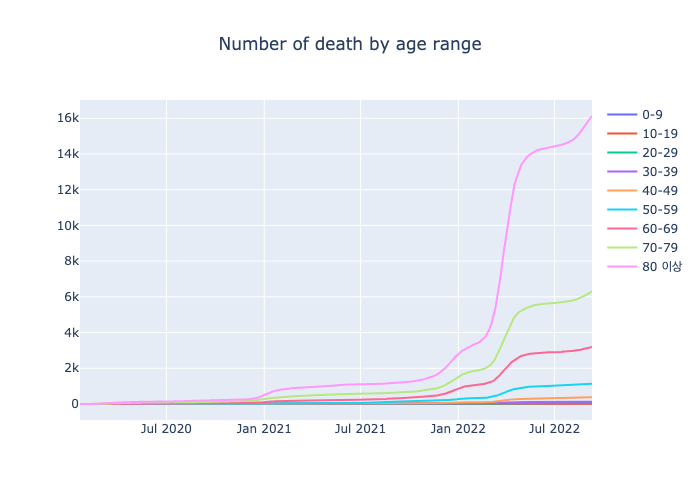

In [140]:
charts = []
for age in list(getCovidGenAge_age.category.unique()):
    getCovidGenAge_age2 = getCovidGenAge_age[getCovidGenAge_age.category == age]
    charts.append(go.Scatter(x=getCovidGenAge_age2.date, y=getCovidGenAge_age2.total_number_death, name=getCovidGenAge_age2.iloc[1].category))

fig = go.Figure(charts)
fig.update_layout(
    title=dict(
        text='Number of death by age range',
        x=0.5
    )
)
fig.show('png')

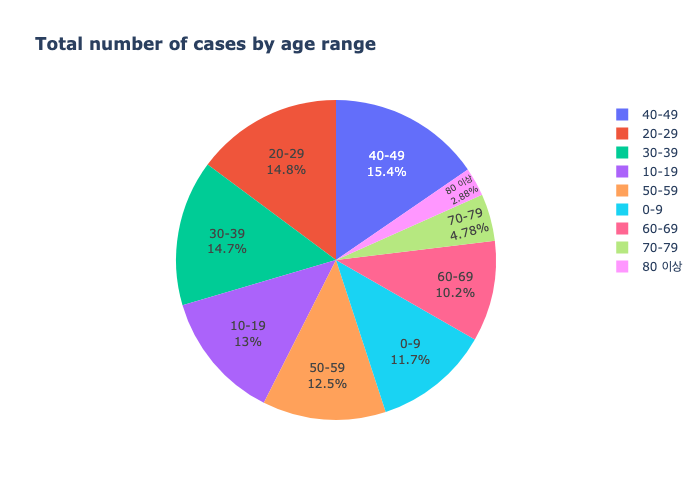

In [141]:
fig = px.pie(
    getCovidGenAge_age, 
    values='total_confirmed_cases', 
    names='category', 
    title=f"<b>Total number of cases by age range</b>",
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show('png')

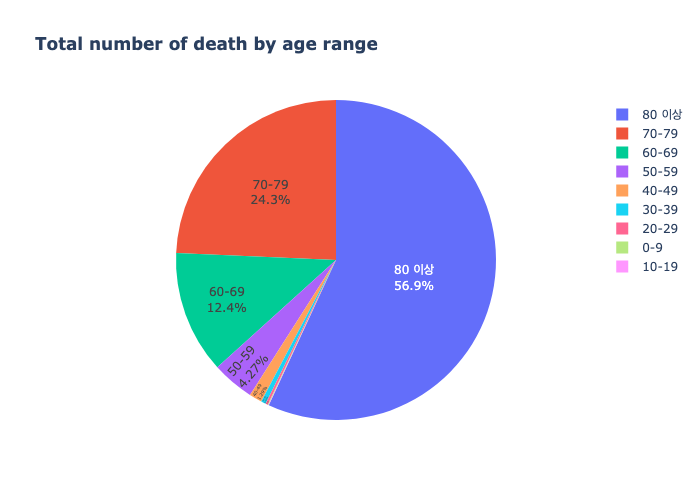

In [142]:
fig = px.pie(
    getCovidGenAge_age, 
    values='total_number_death', 
    names='category', 
    title=f"<b>Total number of death by age range</b>",
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show('png')

In [143]:
# Preapring dataset where category with only gender
getCovidGenAge_gender = getCovidGenAge.copy()

In [144]:
getCovidGenAge_gender

,date,total_confirmed_cases,total_number_death,category
0,2022-09-09 09:18:23.254,2678848,31,0-9
1,2022-09-09 09:18:23.253,3065517,16,10-19
2,2022-09-09 09:18:23.253,3551214,68,20-29
3,2022-09-09 09:18:23.253,3502843,129,30-39
4,2022-09-09 09:18:23.253,3658375,375,40-49
...,...,...,...,...
10599,2020-01-20 09:00:00.000,0,0,40-49
10600,2020-01-20 09:00:00.000,1,0,30-39
10601,2020-01-20 09:00:00.000,0,0,20-29
10602,2020-01-20 09:00:00.000,0,0,10-19


In [145]:
# Only keep gender and remove age range
gender = ['남성', '여성']
getCovidGenAge_gender2 =getCovidGenAge_gender[getCovidGenAge_gender.category.isin(gender)]
getCovidGenAge_gender2

,date,total_confirmed_cases,total_number_death,category
9,2022-09-09 09:18:23.252,12732921,13990,여성
10,2022-09-09 09:18:23.251,11201028,13391,남성
20,2022-09-08 09:07:50.404,12694766,13958,여성
21,2022-09-08 09:07:50.404,11169794,13355,남성
31,2022-09-07 09:10:54.600,12654582,13931,여성
...,...,...,...,...
10572,2020-01-22 09:00:00.000,1,0,여성
10582,2020-01-21 09:00:00.000,0,0,남성
10583,2020-01-21 09:00:00.000,1,0,여성
10593,2020-01-20 09:00:00.000,0,0,남성


In [146]:
getCovidGenAge_gender2['category'] =getCovidGenAge_gender2['category'].replace(['남성'], 'Male')
getCovidGenAge_gender2['category'] =getCovidGenAge_gender2['category'].replace(['여성'], 'Female')

/var/folders/ck/7rl0rykj64zcl8t3byxm8_vr0000gn/T/ipykernel_26338/588458838.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ck/7rl0rykj64zcl8t3byxm8_vr0000gn/T/ipykernel_26338/588458838.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [147]:
getCovidGenAge_gender2

,date,total_confirmed_cases,total_number_death,category
9,2022-09-09 09:18:23.252,12732921,13990,Female
10,2022-09-09 09:18:23.251,11201028,13391,Male
20,2022-09-08 09:07:50.404,12694766,13958,Female
21,2022-09-08 09:07:50.404,11169794,13355,Male
31,2022-09-07 09:10:54.600,12654582,13931,Female
...,...,...,...,...
10572,2020-01-22 09:00:00.000,1,0,Female
10582,2020-01-21 09:00:00.000,0,0,Male
10583,2020-01-21 09:00:00.000,1,0,Female
10593,2020-01-20 09:00:00.000,0,0,Male


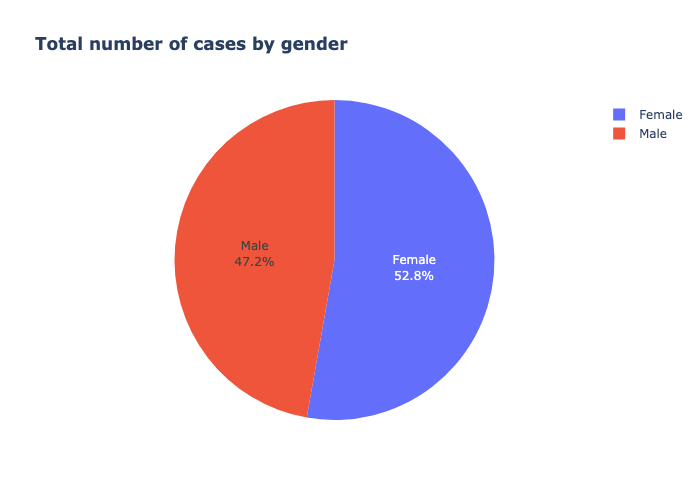

In [148]:
fig = px.pie(
    getCovidGenAge_gender2, 
    values='total_confirmed_cases', 
    names='category', 
    title=f"<b>Total number of cases by gender</b>",
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show('png')

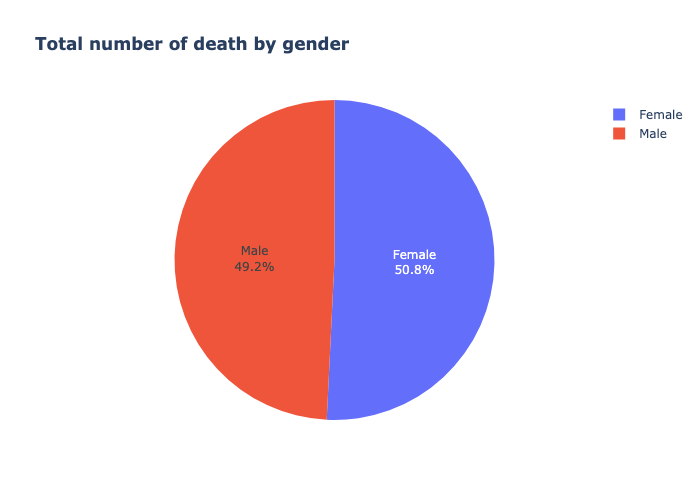

In [149]:
fig = px.pie(
    getCovidGenAge_gender2, 
    values='total_number_death', 
    names='category', 
    title=f"<b>Total number of death by gender</b>",
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show('png')

### Further development
We have observed the trend of COVID-19 cases in South Korea from different aspects. There are further development to improve this project.
- Looking at the distribution of doctor and nurses by region to see whether there are appropriate number of doctors and nurses are located.
- Since elder people are more exposed to death due to COVID-19, observe the distribution of elder people's living region and compare it with their access to hospital. In South Korea, as lot of elder people moved to rural area to live, there are chances that lack of accessibility to hospital may affect the number of death.
- Lastly, after making all the data and visualization, we can use tableau to develop the visualization.